


# Games para todos os gostos!

# Introdução

Esse projeto abrange um vasto banco de dados sobre games de 1985 à 2016. Todas as plataformas catalogadas desde 1985 estão neste projeto e suas vendas desde o início estará contabilizada neste projeto. Uma ampla variedade de games e análises por regiões de vendas, vendas globais e muito mais, vamos nessa!



## Dicionário de dados

Há um DataFrame com amplas informações sobre venda de jogos em plataforas de todo o mundo.

- `games.csv`: Cada linha corresponde a uma coluna no DataFrame
    - `'Name'`: É o nome de cada jogo
    - `'Platform'`: é a Plataforma de jogos
    - `'Year_of_Release (Ano de lançamento)'`: Ano de lançamento dos jogos por plataformas
    - `'Genre'`: Gênero dos jogos
    - `'NA_sales'`: Vendas norte-americanas em milhões de USD
    - `'EU_sales'`: Vendas na Europa em milhões de USD
    - `'EU_sales'`: Vendas na Europa em milhões de USD
    - `'JP_sales'`: Vendas no Japão em milhões de USD
    - `'Other_sales'`: Vendas em outros países em em milhões de USD
    - `'Critic_Score '`: Pontuação crítica de especialistas (máximo de 100)
    - `'User_Score '`: Pontuação do usuários de ganes (máximo de 10)
    - `'Rating (Classificação ESRB)'`: é o Rating classificado pela Entertainment Software Rating Board (ESRB) - organização norte americana que classifica jogos de acordo com a idade para consumo consciente dos usuários.


## Ranting ESRB

- `Classificações`:
    - `'RP'` (Classificação pendente): Este símbolo é utilizado em materiais promocionais de jogos que ainda não receberam classificação final da ESRB.
    - `'RP 17+'`: Este símbolo é usado em materiais promocionais de jogos que ainda não receberam uma classificação final da ESRB, mas que deverão ter uma classificação "Adulto" com base em seu conteúdo.
    - `'E'` (Todos): Os jogos com esta classificação contêm conteúdo que a ESRB acredita ser adequado para todas as idades, [47] incluindo desenhos animados mínimos, fantasia ou violência moderada e/ou uso pouco frequente de linguagem moderada.
    - `'E 10+'` (Todos com mais de 10 anos): Os jogos com esta classificação contêm conteúdo que a ESRB acredita ser adequado para maiores de 10 anos, incluindo desenhos animados, fantasia ou violência moderada , linguagem moderada e/ou uso pouco frequente de linguagem moderada e temas levemente sugestivos.
    - `'T'` (Adolescente): Os jogos com esta classificação contêm conteúdo que a ESRB acredita ser adequado para maiores de 13 anos, incluindo violência, temas sugestivos, humor grosseiro , pouco sangue, uso frequente de linguagem moderada e/ou uso pouco frequente de linguagem forte.
    - `'M'` (Maduro 17+): Os jogos com esta classificação contêm conteúdo que a ESRB acredita ser adequado para maiores de 17 anos, incluindo violência intensa, sangue e violência, conteúdo sexual, linguagem forte, uso de drogas e nudez.
    - `'AO'` (Somente adultos maiores de 18 anos): Os jogos com esta classificação contêm conteúdo que a ESRB acredita ser adequado para maiores de 18 anos, incluindo cenas prolongadas de violência intensa e/ou conteúdo sexual explícito. A maioria dos títulos classificados como AO são videogames adultos que receberam classificação por conteúdo sexual.


## Importando as Bibliotecas:

In [411]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt

# Etapa 1. Carregando os dados:

In [412]:
df = pd.read_csv('games.csv')

In [413]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados
-	Identificação e preenchimento de valores ausentes
-   Verificando dados duplicados
-	Mudança nos títulos das colunas
-   Criação de uma nova coluna com o valor total de vendas


## Corrigindo os dados:

**Removendo dados duplicados no DataFrame:**

In [415]:
df.drop_duplicates(inplace=True)

**Verificando se os dados duplicados foram removidos no DataFrame:**

In [416]:
df.duplicated().sum()

0

**Modificando os títulos das colunas do Dataframe com o método `lower()`:**

In [417]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Renomeando a coluna `name` para `games`:**

In [418]:
df = df.rename(columns={'name': 'games'})
df.head()

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Verificando dados ausentes no DataFrame:**

In [419]:
df.isna().sum()

games                 2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<span style="color:green;">Como podemos notar, há varios valores ausentes no dataframe, vamos analisá-los para avaliar se preencheremos ou não mais pra frente.</span>

**Verificando onde estão os dados ausentes na coluna `Name` e `Genre`:**

In [420]:
missing_ind = df[df['games'].isna()].index
missing_ind

Index([659, 14244], dtype='int64')

In [421]:
missing_ind_2 = df[df['genre'].isna()].index
missing_ind_2

Index([659, 14244], dtype='int64')

<span style="color:green;">Como podemos notar, os valores ausentes em ambas colunas estão localizados nas mesmas linhas, ou seja, são linhas sem informações necessárias que iremos excluílas.</span>

In [490]:
df = df.drop(index=[659, 14244])

In [491]:
df.isna().sum()

games                 0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

<span style="color:green;">Dados ausentes removidos, seguimos com a correção de dados.</span>

**Corrigindo os dados da coluna `Year_of_Release`:**

In [424]:
df['year_of_release'].fillna(0, inplace=True)

In [425]:
df['year_of_release'].isna().sum()

0

In [426]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].dtype

dtype('int32')

<span style="color:green;">Dados ausentes preenchidos, seguimos com a correção de dados.</span>

**Calculando o total de vendas por região por jogo e criando a coluna `total_sales` no DataFrame:**

In [427]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Conclusões

Pudemos notar os seguintes problemas:
- Dados ausentes em várias colunas, porém nas colunas `critic_score`, `user_score` e `rating` eu preferi não preencher os dados ausentes, uma vez que o preenchimento dessas colunas poderia enviesar a análise e não resultar em um trabalho correto.
- Dados ausentes em outras colunas foram preenchidos e alguns removidos, títulos das colunas consertados, dados duplicados verificados e a coluna de `total_sales` criada.


Estamos prontos para começar as Análises!

# Etapa 3. Análise de Dados

-	Iremos levantar os dados a partir de 1985, porém para as análises mais profundas, escolhi os dados do período de 2010 à 2016, pois considero serem dados mais recentes e irão agregar para uma análise mais direta para ajudar nas vendas do próximo ano.


In [428]:
df.head()

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Verificando quantos jogos foram lançados em anos diferentes usando `groupby` para agrupar os dados:**

In [429]:
df_quant_games = df.groupby('year_of_release').agg(qtde_de_games=('games', 'nunique')).reset_index()
df_quant_games_1985 = df_quant_games[df_quant_games['year_of_release'] >= 1985]
df_quant_games_1985

,year_of_release,qtde_de_games
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17
11,1990,16
12,1991,40
13,1992,41
14,1993,59
15,1994,117


<span style="color:green;">Desde de 1985 foram lançados muitos games, de ano após ano, foram aumentando os lançamentos com um decréscimo a partit de 2009, que eu acredito que foi influenciado pela diminuição das plataformas e concentração em somente algumas mais populares.</span>

**Verificando quais os anos que tiveram mais jogos lançados:**

In [430]:
df_quant_games = df.groupby('year_of_release').agg(qtde_de_games=('games', 'nunique')).sort_values(by='qtde_de_games', ascending=False).reset_index()
df_quant_games_1985 = df_quant_games[df_quant_games['year_of_release'] >= 1985]
df_quant_games_1985

,year_of_release,qtde_de_games
0,2008,1039
1,2009,1001
2,2010,900
3,2007,884
4,2011,779
5,2006,773
6,2005,657
7,2002,631
8,2004,550
9,2003,546


<span style="color:green;">Agora podemos notar que entre os anos de 2008 e 2010 foram lançados cerca de 3000 jogos, o auge dos lançamentos.</span>

**Verificando quantas plataformas diferentes temos no DataFrame com `nunique`:**

In [431]:
df['platform'].nunique()

31

**Verificando top 5 plataformas de vendas globais:**

In [432]:
df_plat_total_sales = df.groupby('platform').agg(sales=('total_sales', 'sum')).sort_values(by='sales', ascending=False).reset_index().head()
df_plat_total_sales

,platform,sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [433]:
top_5_games = df_plat_total_sales['platform'].values

**Selecionando dados a partir de 2010 para Análise das 5 plataformas mais relevantes em vendas:**

In [434]:
df_top_platforms = df[df['platform'].isin(top_5_games)]
df_top_platforms_filtered = df_top_platforms[df_top_platforms['year_of_release'] >= 2010]
df_top_platforms_filtered

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16649,Real Crimes: The Unicorn Killer,DS,2011,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


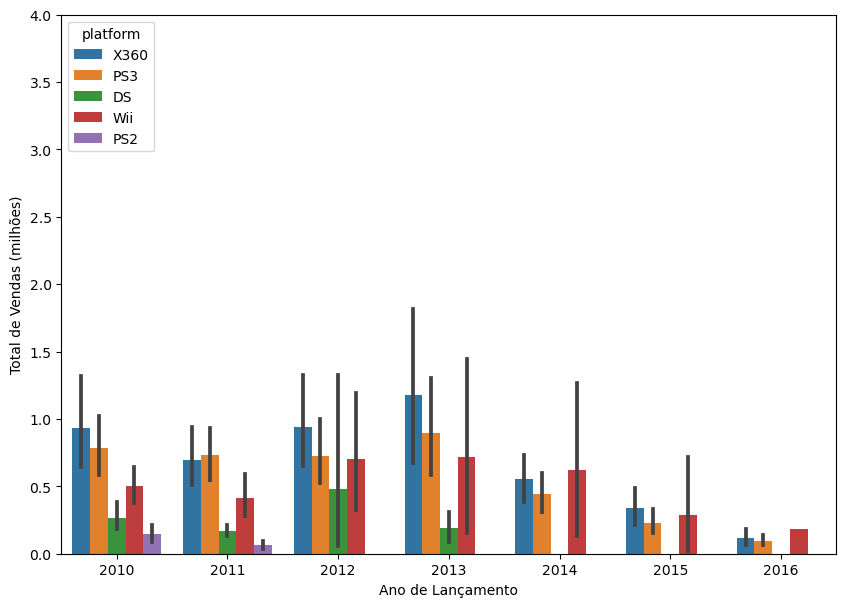

In [435]:
plt.figure(figsize=(10,7))
plt.ylim(0, 4)
sns.barplot(df_top_platforms_filtered, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel("Ano de Lançamento")
plt.ylabel("Total de Vendas (milhões)");

<span style="color:green;">Podemos notar com esse gráfico que a plataforma "X360" se mostra dominante em vendas durante quase todos os anos da análise, até que em 2016 a plataforma "Wii" a ultrapassa. Outro fator relevante é a empresa SONY que descontinuou a plataforma PS2 para focar somente na plataforma PS3.</span>

**Verificando a duração das plataformas em anos a partir do ano de 1985 e o resultado se encontra na coluna `plataform_during_time`:**

In [436]:
group_more_1985 = df[df['year_of_release'] >= 1985]
grouped = group_more_1985.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()
grouped.columns = ['platform', 'year_of_release_start', 'year_of_release_end']
grouped['plataform_during_time'] = grouped['year_of_release_end'] - grouped['year_of_release_start']
grouped.sort_values(by='plataform_during_time', ascending=False).reset_index(drop=True)

,platform,year_of_release_start,year_of_release_end,plataform_during_time
0,PC,1985,2016,31
1,DS,1985,2013,28
2,GB,1988,2001,13
3,PSP,2004,2015,11
4,PS2,2000,2011,11
5,X360,2005,2016,11
6,PS3,2006,2016,10
7,DC,1998,2008,10
8,Wii,2006,2016,10
9,NES,1985,1994,9


<span style="color:green;">O que podemos notar nessa análise é que duas plataformas são bastante duradouras: "PC" e "DS" com 31 e 28 anos de duração respectivamente. Entretanto outras plataformas, duraram somente um ano e outras foram lançadas em um ano e neste mesmo ano descontinuada.</span>

**Selecionando dados a partir de 2010 para Análise gráfica de vendas das plataformas usando o `Diagrama de Caixa`:**

In [437]:
global_sales = df.groupby(['games', 'platform', 'year_of_release']).agg(sales=('total_sales', 'sum')).sort_values(by='sales', ascending=False).reset_index()
global_sales_filtered = global_sales[global_sales['year_of_release'] >= 2010]
global_sales_filtered

,games,platform,year_of_release,sales
14,Kinect Adventures!,X360,2010,21.82
16,Grand Theft Auto V,PS3,2013,21.05
23,Grand Theft Auto V,X360,2013,16.27
27,Pokemon Black/Pokemon White,DS,2010,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,14.73
...,...,...,...,...
16695,Gummy Bears Magical Medallion,Wii,2011,0.01
16696,Breach,PC,2011,0.01
16702,Sherlock Holmes: The Devil's Daughter,PC,2016,0.01
16705,Sherlock Holmes: The Devil's Daughter,PS4,2016,0.01


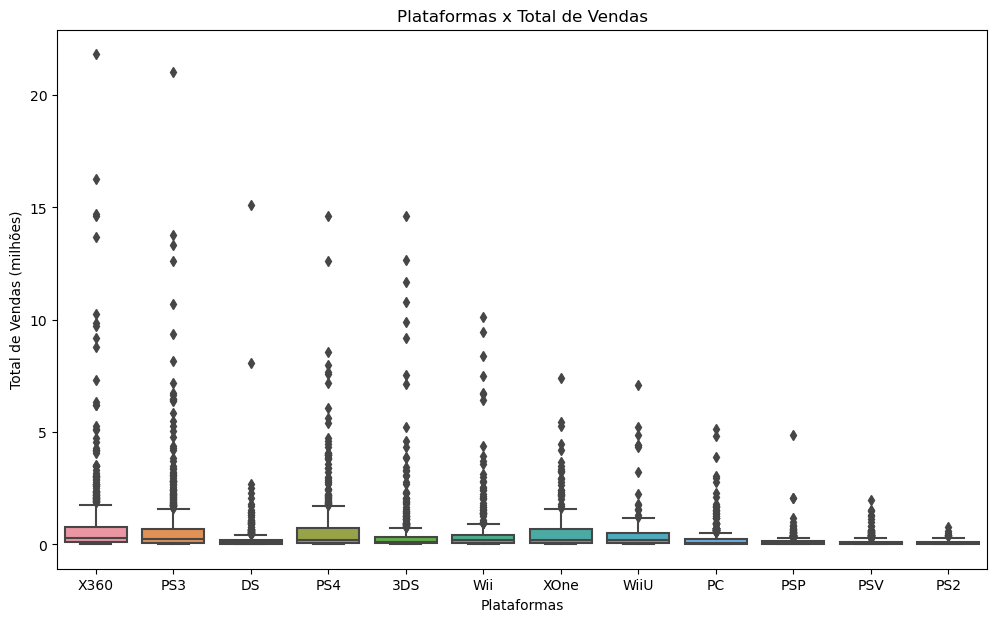

In [438]:
plt.figure(figsize=(12,7))
sns.boxplot(data=global_sales_filtered, x='platform', y='sales')
plt.title('Plataformas x Total de Vendas')
plt.xlabel("Plataformas")
plt.ylabel("Total de Vendas (milhões)");

<span style="color:green;">No gráfico podemos notar que muitas das plataformas apresentam vários valores de vendas atípicos, isso mostra quão variáveis estão os dados de vendas de algumas plataformas. Outro fator relevante é que a maioria dos dados de vendas das plataformas estão localizados acima da mediana.</span>

**Selecionando a plataforma `Wii` de exmemplo para Análise mais profunda de dados:**

In [439]:
wii_platform = df[df['platform'] == 'Wii']
wii_platform

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,NaN,tbd,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


**Agregando dados para Análise:**

In [440]:
rated_sales_games = wii_platform.groupby(['platform', 'critic_score', 'user_score']).agg(sales=('total_sales', 'sum')).reset_index()
rated_sales_games


,platform,critic_score,user_score,sales
0,Wii,19.0,2.7,0.06
1,Wii,19.0,2.8,0.02
2,Wii,20.0,1.7,0.08
3,Wii,25.0,3.7,0.12
4,Wii,25.0,4.3,2.48
...,...,...,...,...
454,Wii,93.0,8,3.94
455,Wii,93.0,8.9,12.84
456,Wii,95.0,9,7.16
457,Wii,97.0,8.9,11.35


**Utilizando o Gráfico de Dispersão para análise entre Vendas Globais x Revisão dos Críticos da plataforma `Wii`:**

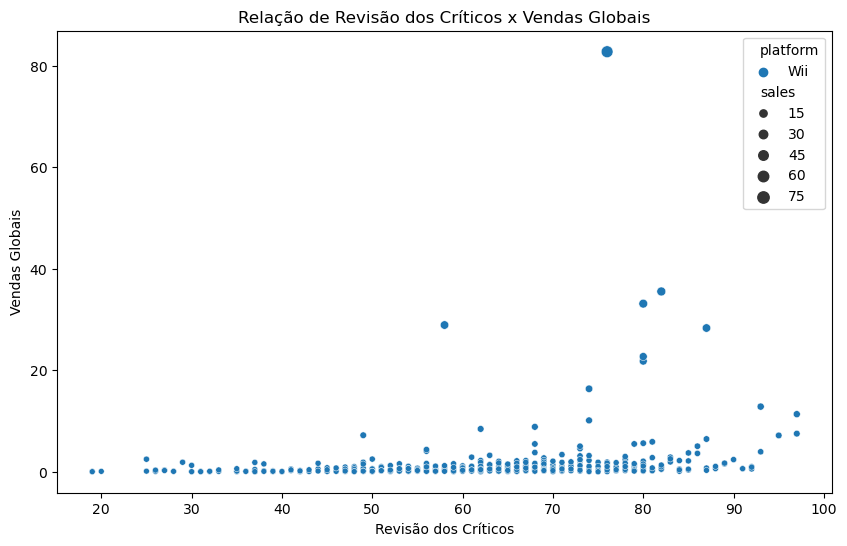

In [441]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='sales', hue='platform', size='sales', data=rated_sales_games)
plt.title('Relação de Revisão dos Críticos x Vendas Globais')
plt.xlabel('Revisão dos Críticos')
plt.ylabel('Vendas Globais');

<span style="color:green;">O que podemos notar olhando o gráfico é que uma Revisão dos Críticos com uma nota mais alta influencia na vendas da plataforma. Nota-se que a partir de revisão "70+" há mais vendas, o que mostra uma leve correlação positiva entre as duas variáveis.</span>

**Utilizando o Gráfico de Dispersão para análise entre Vendas Globais x Revisão dos Usuários da plataforma `Wii`:**

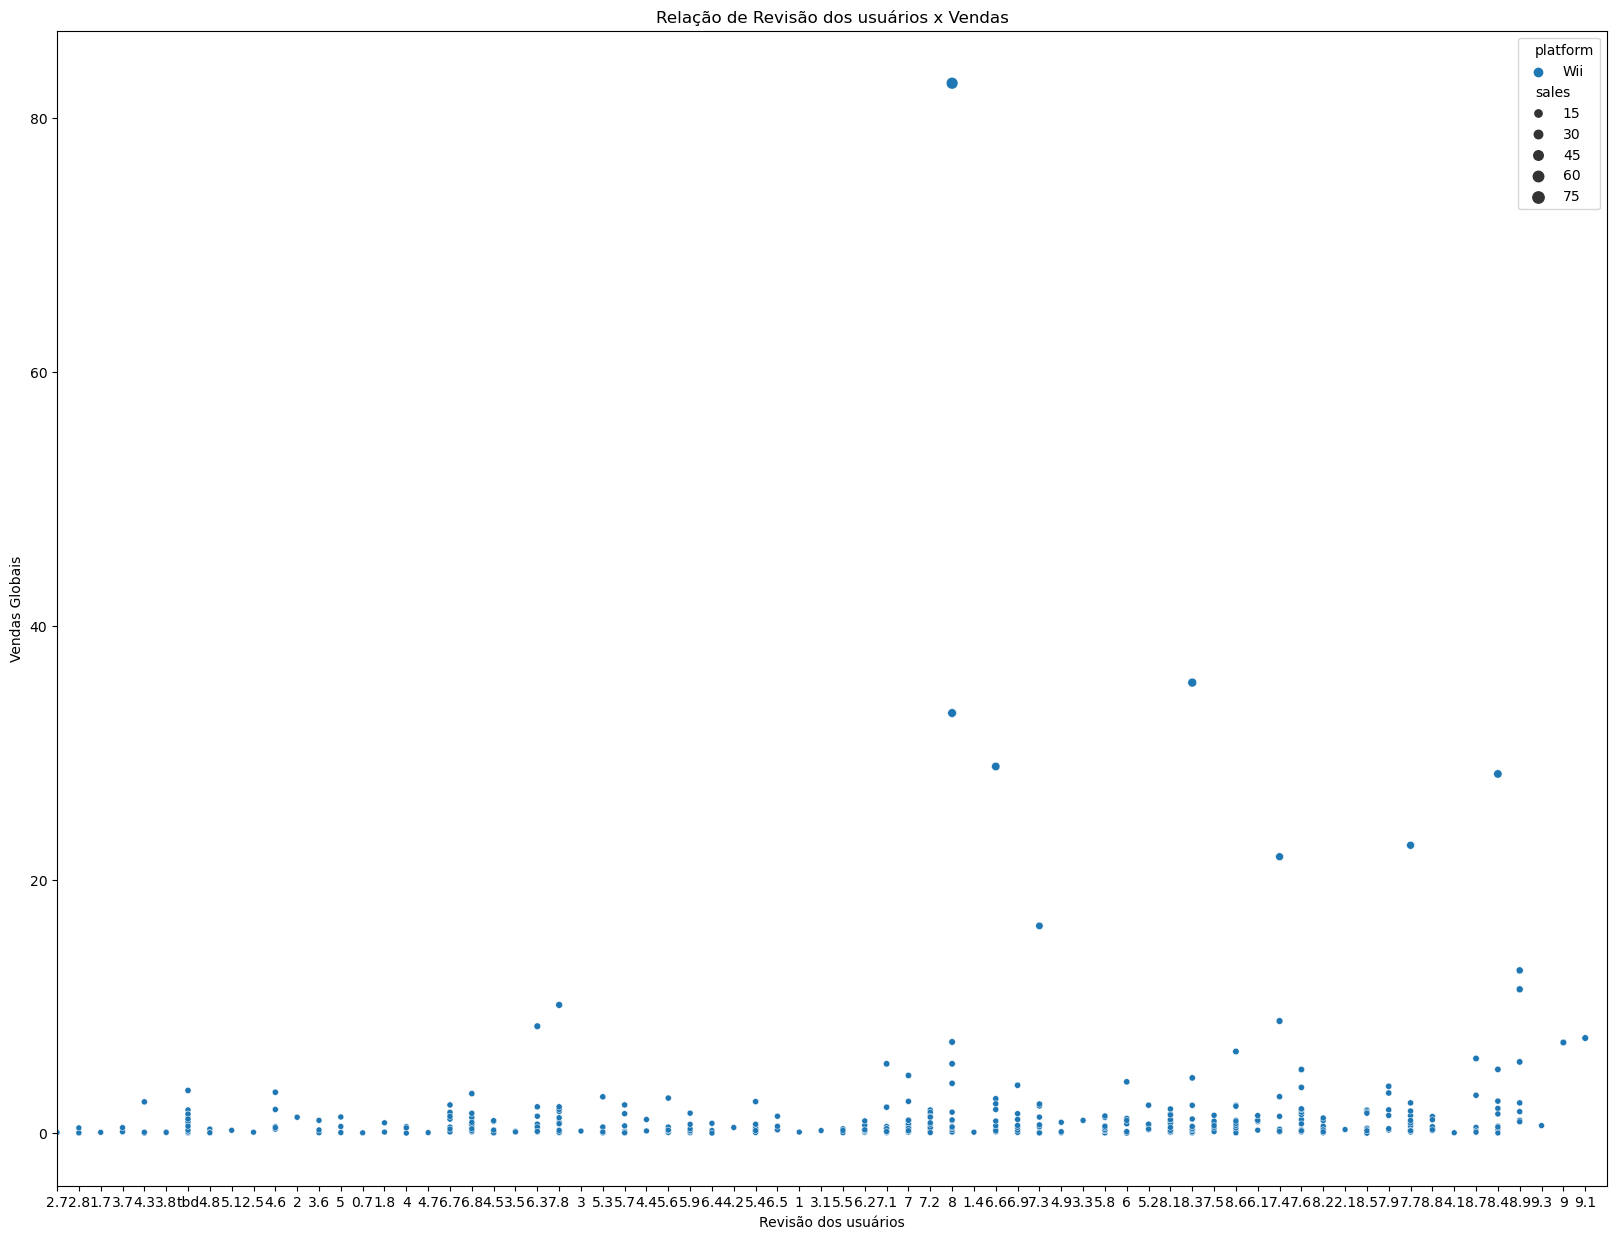

In [519]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='user_score', y='sales', hue='platform', size='sales', data=rated_sales_games)
plt.title('Relação de Revisão dos usuários x Vendas')
plt.xlabel('Revisão dos usuários')
plt.ylabel('Vendas Globais')
plt.xlim(0,71);

<span style="color:green;">O que podemos notar olhando o gráfico é que uma Revisão dos Usuários com uma nota mais alta influencia na vendas da plataforma. Nota-se que a partir de revisão "7+" há mais vendas, o que mostra uma leve correlação positiva entre as duas variáveis. Com destaque para quando a nota atinge o patamar de 8 pontos, tem um aumento de venda expressivo para a plataforma.</span>

**Agregando dados da coluna `Genre` para analisar as vendas:**

In [443]:
genre_games = df.groupby('genre').agg(sales=('total_sales', 'sum')).sort_values(by='sales', ascending=False).reset_index()
genre_games

,genre,sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


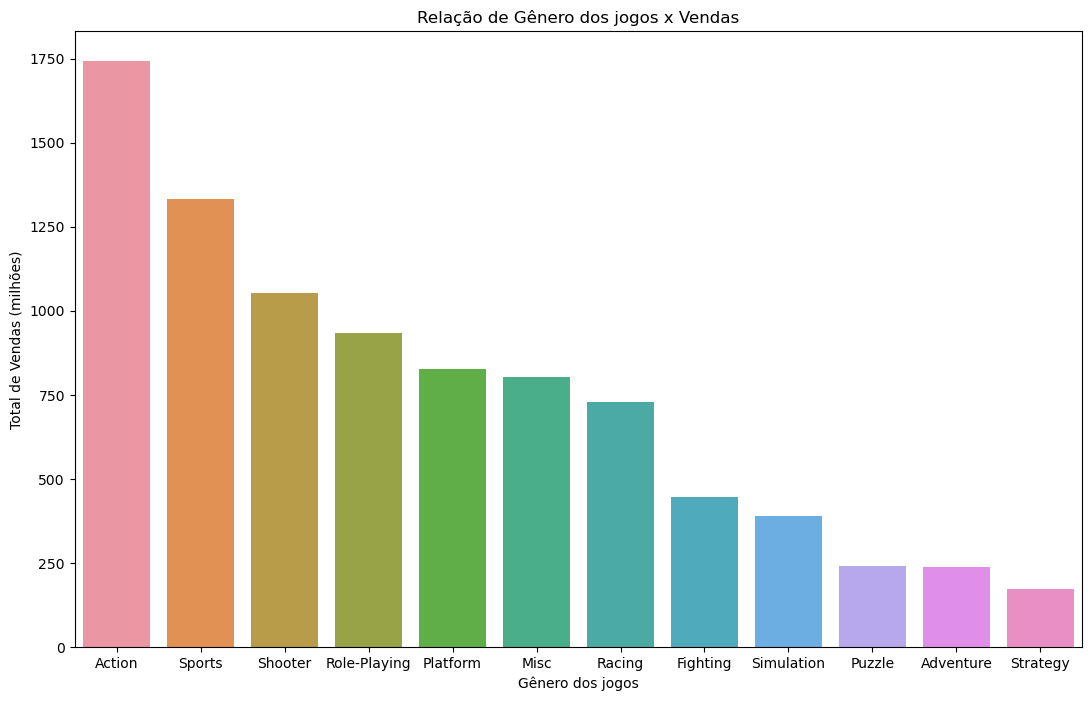

In [444]:
plt.figure(figsize=(13, 8))
sns.barplot(data=genre_games, x='genre', y='sales')
plt.title('Relação de Gênero dos jogos x Vendas')
plt.xlabel("Gênero dos jogos")
plt.ylabel("Total de Vendas (milhões)");

<span style="color:green;">Olhando graficamente, podemos notar principalmente que os gêneros "Action", "Sports" e "Shooter" são os mais dominantes entre todos os gêneros nas vendas globais dos jogos.</span>

### Conclusões das Análises da 3ª Etapa:
-   São 31 plataformas únicas no Dataframe e as top 5 vendas globais em ordem são as: PS2, X360, PS3, Wii e DS.
-   Durante as análises gráficas, pudemos notar que a plataforma X360 foi campeão de vendas de 2010 à 2015.
-   Ná análise de vendas pelo Diagrama de Caixa notou-se bastante valores atípicos e os dados se encontraram predominantemente acima da mediana.
-   Durante análise da plataforma "Wii" especificamente, notou-se que as revisões dos críticos e dos usuários influenciaram nas vendas, uma vez que se mostrou uma leve correlação positiva entre as vendas e as revisões a partir das notas 70+ e 7+.
-   Por fim, chegou-se a conclusão que os gêneros de games mais vendidos são "Action", "Sports" e "Shooter".

# Etapa 4. Análise por Regiões

-	As cinco principais plataformas por região mais vendidas
-	Os cinco principais gêneros mais vendidos
-   Verificação se as classificações do ESRB estão afetando as vendas em regiões individuais


In [445]:
df.head()

,games,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Verificando as cinco plataformas principais na região `NA`:**

In [446]:
top_5_sales_na = df.groupby('platform').agg(na_sales=('na_sales', 'sum')).sort_values(by='na_sales', ascending=False).reset_index().head()
top_5_sales_na

,platform,na_sales
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.40


<span style="color:green;">Pode-se notar que as principais plataformas em vendas na região NA são: X360, PS2, Wii, PS3 e DS. .</span>

**Verificando os cinco gêneros principais na região `NA`:**

In [447]:
top_5_genres_na = df.groupby('genre').agg(na_sales=('na_sales', 'sum')).sort_values(by='na_sales', ascending=False).reset_index().head()
top_5_genres_na

,genre,na_sales
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27


<span style="color:green;">Pode-se notar que os principais gêneros de jogos em vendas na região NA são: Action, Sports, Shooter, Platform e Misc.</span>

**Verificando se o rating ESRB está influenciando nas vendas da região `NA`:**

In [470]:
top_25_sales_games_na = df.groupby('games').agg(na_sales=('na_sales', 'sum')).sort_values(by='na_sales', ascending=False).reset_index().head(25)
top_25_sales_games_na

,games,na_sales
0,Wii Sports,41.36
1,Super Mario Bros.,32.48
2,Duck Hunt,26.93
3,Tetris,26.17
4,Grand Theft Auto V,23.84
5,Call of Duty: Black Ops,17.57
6,Super Mario World,15.99
7,Mario Kart Wii,15.68
8,Wii Sports Resort,15.61
9,Call of Duty: Modern Warfare 3,15.54


<span style="color:green;">Filtrando uma amostra dos 25 jogos mais vendidos na região NA para análise.</span>

In [471]:
top_25_games_na = top_25_sales_games_na['games'].values

In [472]:
df_top_25_na = df[df['games'].isin(top_25_games_na)]
rated_sales_na = df_top_25_na.groupby(['games', 'rating']).agg(na_sales=('na_sales', 'sum')).sort_values(by='na_sales', ascending=False).reset_index()
rated_sales_na

,games,rating,na_sales
0,Wii Sports,E,41.36
1,Grand Theft Auto V,M,23.84
2,Call of Duty: Black Ops,M,17.07
3,Mario Kart Wii,E,15.68
4,Wii Sports Resort,E,15.61
5,Call of Duty: Modern Warfare 3,M,15.54
6,Kinect Adventures!,E,15.00
7,Call of Duty: Ghosts,M,14.71
8,New Super Mario Bros. Wii,E,14.44
9,Call of Duty: Black Ops II,M,14.08


<span style="color:green;">Por dados inexsitentes em relação ao Rating de alguns jogos, a amostra diminuiu para 16 jogos.</span>

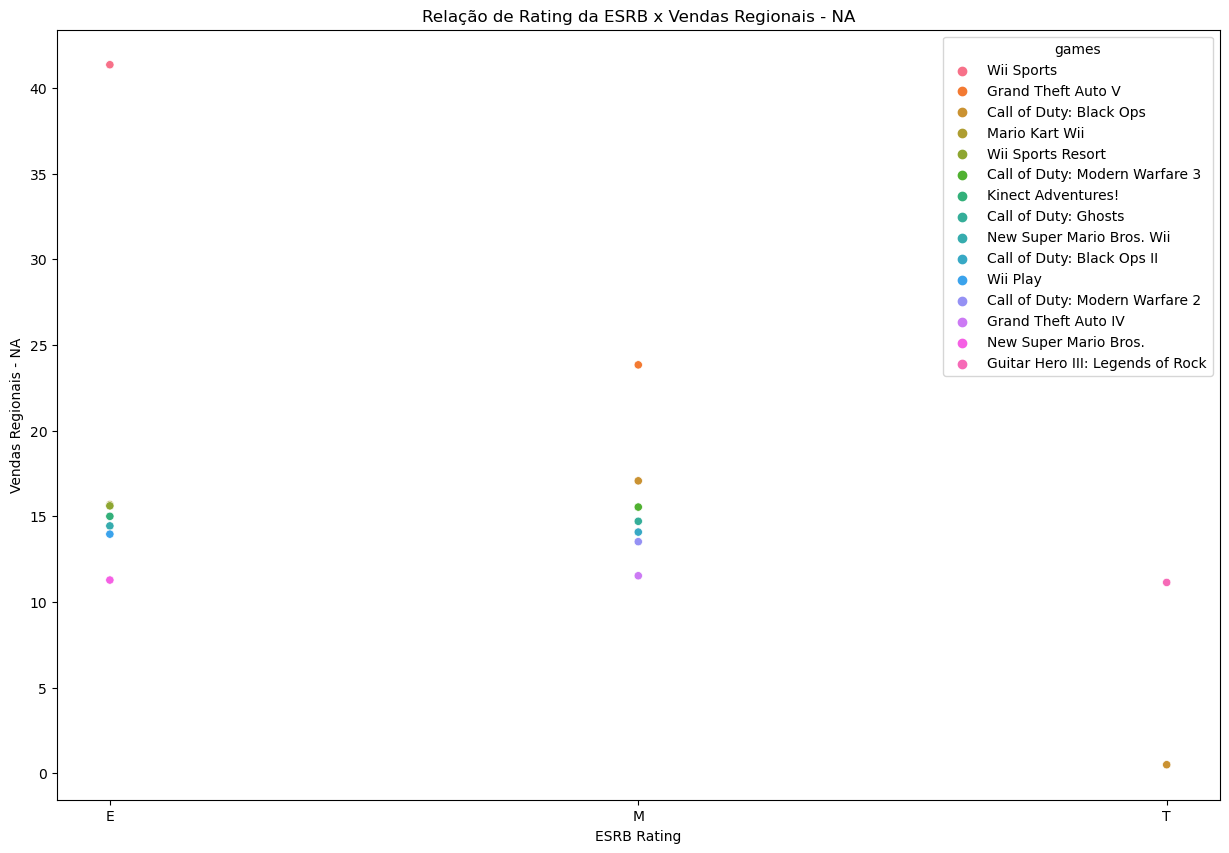

In [473]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='rating', y='na_sales', hue='games', data=rated_sales_na)
plt.title('Relação de Rating da ESRB x Vendas Regionais - NA')
plt.xlabel('ESRB Rating')
plt.ylabel('Vendas Regionais - NA');

<span style="color:green;">Olhando para o gráfico, podemos notar que quando o jogo é classifacado como "E" (todos) que é liberado para qualquer idade, há uma venda diferenciada em relação aos outros games, porém notou-se também que os jogos classifcados como "M" (Maiores de 17 anos) possui bastantes jogos com maiores vendas na região.</span>

**Verificando as cinco plataformas principais na região `EU`:**

In [ ]:
top_5_sales_eu = df.groupby('platform').agg(eu_sales=('eu_sales', 'sum')).sort_values(by='eu_sales', ascending=False).reset_index().head()
top_5_sales_eu

,platform,eu_sales
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


<span style="color:green;">Diferemente da região NA, as principais plataformas em vendas da região EU são: PS2, PS3, X360, Wii e PS3.</span>

**Verificando os cinco gêneros principais na região `EU`:**

In [ ]:
top_5_genres_eu = df.groupby('genre').agg(eu_sales=('eu_sales', 'sum')).sort_values(by='eu_sales', ascending=False).reset_index().head()
top_5_genres_eu

,genre,eu_sales
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74


<span style="color:green;">Os principais gêneros de jogos em vendas na região EU são: Action, Sports, Shooter, Racing e Misc. A diferença nos gêneros da região NA e EU é o estilo "Racing".</span>

**Verificando se o rating ESRB está influenciando nas vendas da região `EU`:**

In [474]:
top_25_sales_games_eu = df.groupby('games').agg(eu_sales=('eu_sales', 'sum')).sort_values(by='eu_sales', ascending=False).reset_index().head(25)
top_25_sales_games_eu

,games,eu_sales
0,Wii Sports,28.96
1,Grand Theft Auto V,23.42
2,Mario Kart Wii,12.76
3,FIFA 15,12.02
4,Call of Duty: Modern Warfare 3,11.15
5,FIFA 16,11.09
6,FIFA 14,10.96
7,Nintendogs,10.95
8,Wii Sports Resort,10.93
9,Call of Duty: Black Ops II,10.84


<span style="color:green;">Filtrando uma amostra dos 25 jogos mais vendidos na região EU para análise.</span>

In [475]:
top_25_games_eu = top_25_sales_games_eu['games'].values

In [478]:
df_top_25_eu = df[df['games'].isin(top_25_games_eu)]
rated_sales_eu = df_top_25_eu.groupby(['games', 'rating']).agg(eu_sales=('eu_sales', 'sum')).sort_values(by='eu_sales', ascending=False).reset_index()
rated_sales_eu

,games,rating,eu_sales
0,Wii Sports,E,28.96
1,Grand Theft Auto V,M,23.42
2,Mario Kart Wii,E,12.76
3,FIFA 15,E,12.02
4,Call of Duty: Modern Warfare 3,M,11.15
5,FIFA 16,E,11.09
6,Wii Sports Resort,E,10.93
7,Call of Duty: Black Ops II,M,10.84
8,FIFA 14,E,10.74
9,FIFA Soccer 13,E,10.16


<span style="color:green;">Por dados inexsitentes em relação ao Rating de alguns jogos, a amostra diminuiu para 22 jogos.</span>

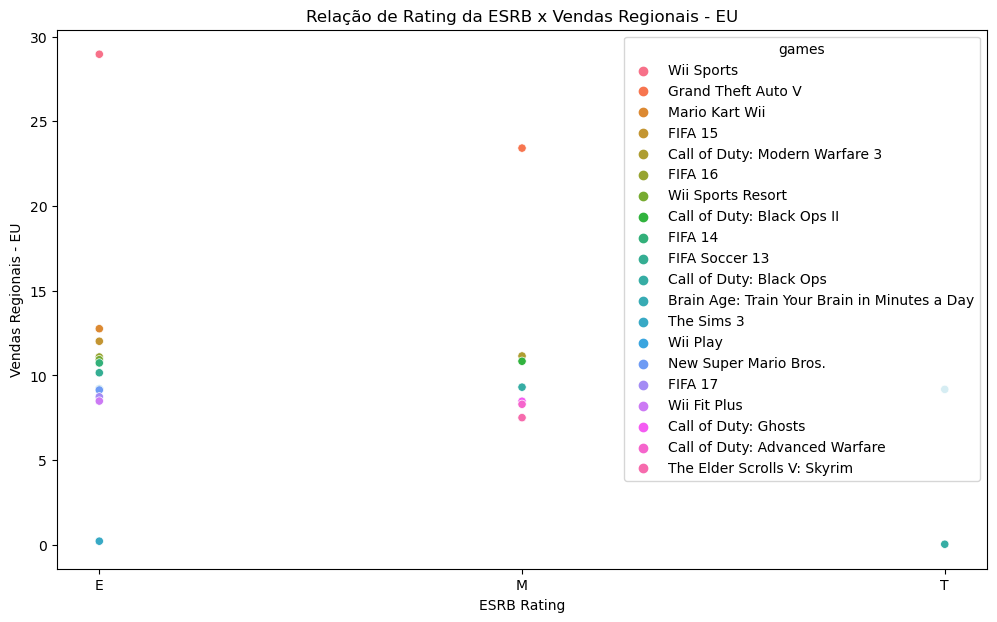

In [482]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='rating', y='eu_sales', hue='games', data=rated_sales_eu)
plt.title('Relação de Rating da ESRB x Vendas Regionais - EU')
plt.xlabel('ESRB Rating')
plt.ylabel('Vendas Regionais - EU');

<span style="color:green;">Olhando para o gráfico, podemos notar que quando o jogo é classifacado como "E" (todos) que é liberado para qualquer idade, há uma venda diferenciada em relação aos outros games, porém notou-se também que os jogos classifcados como "M" (Maiores de 17 anos) possui bastantes jogos com maiores vendas na região.</span>

**Verificando as cinco plataformas principais na região `JP`:**

In [ ]:
top_5_sales_jp = df.groupby('platform').agg(jp_sales=('jp_sales', 'sum')).sort_values(by='jp_sales', ascending=False).reset_index().head()
top_5_sales_jp

,platform,jp_sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67


<span style="color:green;">Na região JP nota-se uma grande diferença nas vendas de plataformas em relação as outras regiões, são elas: DS, PS, PS2, SNES e 3DS.</span>

**Verificando os cinco gêneros principais na região `JP`:**

In [ ]:
top_5_genres_jp = df.groupby('genre').agg(jp_sales=('jp_sales', 'sum')).sort_values(by='jp_sales', ascending=False).reset_index().head()
top_5_genres_jp

,genre,jp_sales
0,Role-Playing,355.41
1,Action,161.43
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11


<span style="color:green;">Na região JP nota-se uma relativa diferença dos gêneros de jogos em relação as outras regiões, são elas: Role-Playing, Action, Sports, Platform e Misc.</span>

**Verificando se o rating ESRB está influenciando nas vendas da região `JP`:**

In [483]:
top_25_sales_games_jp = df.groupby('games').agg(jp_sales=('jp_sales', 'sum')).sort_values(by='jp_sales', ascending=False).reset_index().head(25)
top_25_sales_games_jp

,games,jp_sales
0,Pokemon Red/Pokemon Blue,10.22
1,Pokemon Gold/Pokemon Silver,7.20
2,Super Mario Bros.,6.96
3,New Super Mario Bros.,6.50
4,Pokemon Diamond/Pokemon Pearl,6.04
5,Tetris,6.03
6,Pokemon Black/Pokemon White,5.65
7,Dragon Quest VII: Warriors of Eden,5.40
8,Pokemon Ruby/Pokemon Sapphire,5.38
9,Animal Crossing: Wild World,5.33


<span style="color:green;">Filtrando uma amostra dos 25 jogos mais vendidos na região JP para análise.</span>

In [485]:
top_25_games_jp = top_25_sales_games_jp['games'].values

In [486]:
df_top_25_jp = df[df['games'].isin(top_25_games_jp)]
rated_sales_jp = df_top_25_jp.groupby(['games', 'rating']).agg(jp_sales=('jp_sales', 'sum')).sort_values(by='jp_sales', ascending=False).reset_index()
rated_sales_jp

,games,rating,jp_sales
0,New Super Mario Bros.,E,6.50
1,Animal Crossing: Wild World,E,5.33
2,Brain Age 2: More Training in Minutes a Day,E,5.32
3,New Super Mario Bros. Wii,E,4.70
4,Dragon Quest VIII: Journey of the Cursed King,T,4.47
5,Animal Crossing: New Leaf,E,4.39
6,Dragon Quest IX: Sentinels of the Starry Skies,E10+,4.35
7,Brain Age: Train Your Brain in Minutes a Day,E,4.16
8,Monster Hunter Freedom Unite,T,4.13
9,Final Fantasy III,E10+,1.07


<span style="color:green;">Por dados inexsitentes em relação ao Rating de alguns jogos, a amostra diminuiu para 11 jogos.</span>

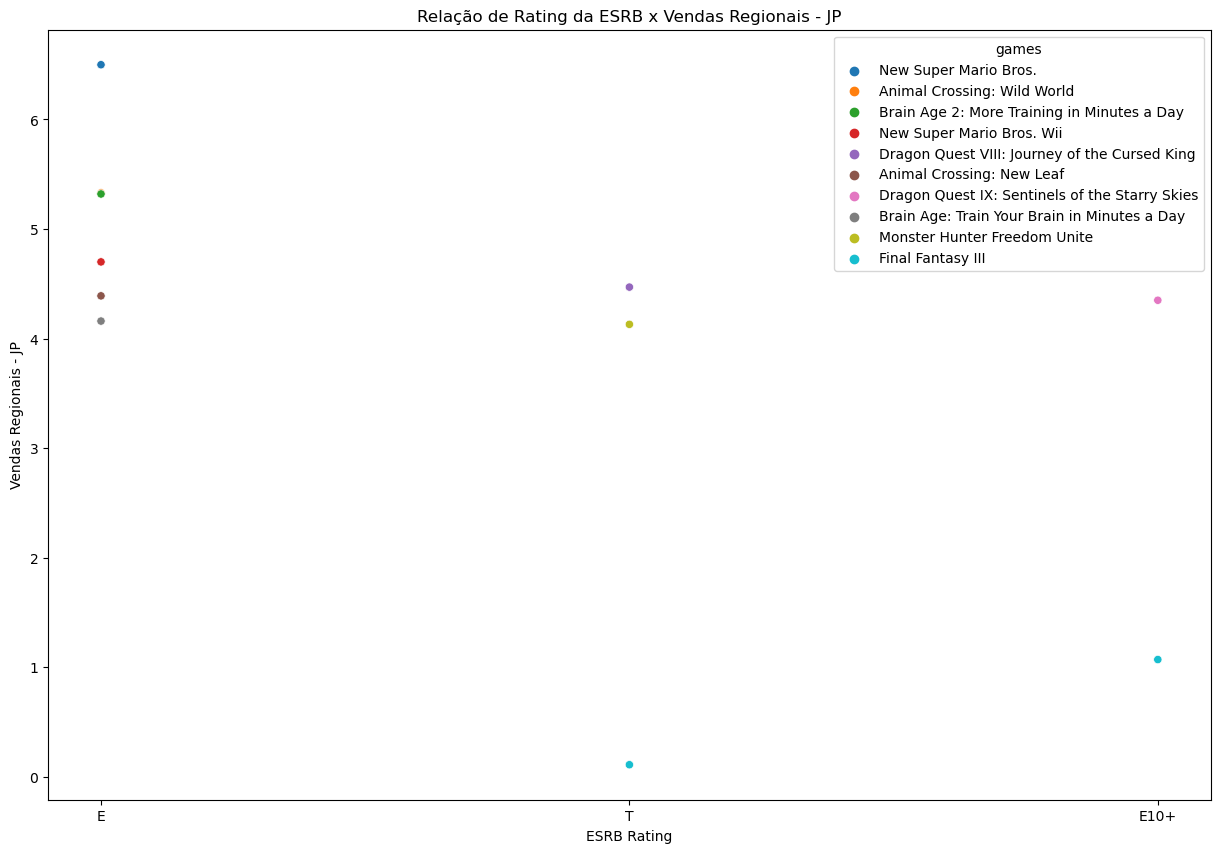

In [488]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='rating', y='jp_sales', hue='games', data=rated_sales_jp)
plt.title('Relação de Rating da ESRB x Vendas Regionais - JP')
plt.xlabel('ESRB Rating')
plt.ylabel('Vendas Regionais - JP');

<span style="color:green;">Olhando para o gráfico, podemos notar que quando o jogo é classifacado como "E" (todos) que é liberado para qualquer idade predominam nas vendas da região. Encontra-se também no gráficos dois jogos que se destacam nas vendas para a classificação "T" (Maiores de 18 anos).</span>

### Conclusões da Análise por `Regiões`:

-   Pôde-se concluir que as regiões NA e EU possuem preferências bem similares, com alguns itens diferentes, mas com uma grande diferença em relação à vendas, realmente a região NA é uma grande consumidora de plataformas e games.
-   A região JP é uma região à parte, uma vez que apresentou vendas menores e também preferências bem diferentes em relação as outras regiões, que mostra a necessidade de uma estratégia diferente para a mesma.
- Por fim, e não menos importante, a inexistência de algumas classificações de "Rating" de alguns jogos prejudicou a análise, porém pôde-se notar que jogos que não possuem restrição de idade, há uma tendência de vendas maiores nesses casos.

# Etapa 5. Teste de Hipóteses

-	`1ª Hipótese` - As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
-	`2ª Hipótese` - As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.


## Testando a `1ª Hipótese`:

In [ ]:
xboxone_rating = df.loc[df['platform'] == "XOne", 'user_score']
pc_rating = df.loc[df['platform'] == "PC", 'user_score']

**Calculando a variância de ambas plataformas de jogo:**

In [ ]:
xboxone_rating.var(), pc_rating.var()

(1.9069968429360702, 2.3407871413372)

**Formulando as `Hipóteses`:**

`Hipótese Nula`: As classificações médias dos usuários das plataformas Xbox One e PC `"NÃO"` são as mesmas.

`Hipótese Alternativa`: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [ ]:
alpha = 0.05
results = st.ttest_ind(xboxone_rating, pc_rating, nan_policy='omit', equal_var=False)
print('valor-p: ', results.pvalue)
if (results.pvalue < alpha):
    print('Rejeitamos a hipóstese nula')
else:
    print('Não Rejeitamos a hipóstese nula')

valor-p:  4.935072360183574e-06
Rejeitamos a hipóstese nula


<span style="color:green;">Nós iremos rejeitar a hipótese nula, uma vez que as classifcações médias dos usuários são diferentes.</span>

## Testendo a  `2ª Hipótese`:

In [ ]:
genre_action_rating = df.loc[df['genre'] == "Action", 'user_score']
genre_sports_rating = df.loc[df['genre'] == "Sports", 'user_score']

**Calculando a variância de ambos os estilos de jogo:**

In [ ]:
genre_action_rating.var(), genre_sports_rating.var()

(2.031746898033191, 2.5965147189730073)

**Formulando novas `Hipóteses`:**

`Hipótese Nula`: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) `"NÃO"` são diferentes.

`Hipótese Alternativa`: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [ ]:
alpha = 0.05
results = st.ttest_ind(genre_action_rating, genre_sports_rating, nan_policy='omit', equal_var=False)
print('valor-p: ', results.pvalue)
if (results.pvalue < alpha):
    print('Rejeitamos a hipóstese nula')
else:
    print('Não Rejeitamos a hipóstese nula')

valor-p:  0.11483818791498286
Não Rejeitamos a hipóstese nula


<span style="color:green;">Não iremos rejeitar a hipótese nula, uma vez que as classifcações médias de usuários NÃO são diferentes.</span>

### Conclusões dos testes de `Hipóteses`:

-   Podemos concluir que as classificações médias dos usuários para as duas plataformas são diferentes e, por isso, rejeitamos a hipótese nula e no 2º caso, não rejeitamos a hipótese nula, uma vez que a classificações médias dos usuários para os gêneros de games não são diferentes. 

# Conclusão geral

    - Foram identificados muitos dados faltantes na base de dados, alguns foram corrigidos, removidos e preenchidos, porém algumas colunas com dados ausentes foram mantidas para não atrapalhar a Análise final dos dados.
    - Os dados foram analisados e tiramos lições importantes da base de dados, sendo eles: as classifações de Críticos e Usuários fazem sim uma diferença na venda de games e plataformas, as plataformas mais vendidas globalmente são PS2, X360, PS3, Wii e DS e, por fim, os gêneros de games mais vendidos globalmente foram: "Action", "Sports" e "Shooter".
    - Analisando as regiões, podemos notar que NA e EU são similares, porém com diferenças em volume de vendas e JP é bastante diferentes das demais.
    - Por fim, no teste estatístico, pudemos testar hipóteses que demonstraram resultados sobre as classifcações médias dos usuários para gêneros de games e plataformas. 